In [1]:
import numpy
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import flower_dataset as fd
label_dict = ["daisy","dandelion","rose","sunflower","tulip"]

In [2]:
(x_train, y_train), (x_test, y_test) = fd.get_data(normalize=False, one_hot=True, format_size=128)

In [3]:
print(x_train.shape)
print(y_train.shape)

(3458, 128, 128, 3)
(3458, 5)


In [4]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=20):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if (num > 25):
        num = 25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(x_train[i], cmap='binary')
        
        title = str(i) + ',' + label_dict[list(labels[i]).index(1)]
        
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx += 1 
    plt.show()

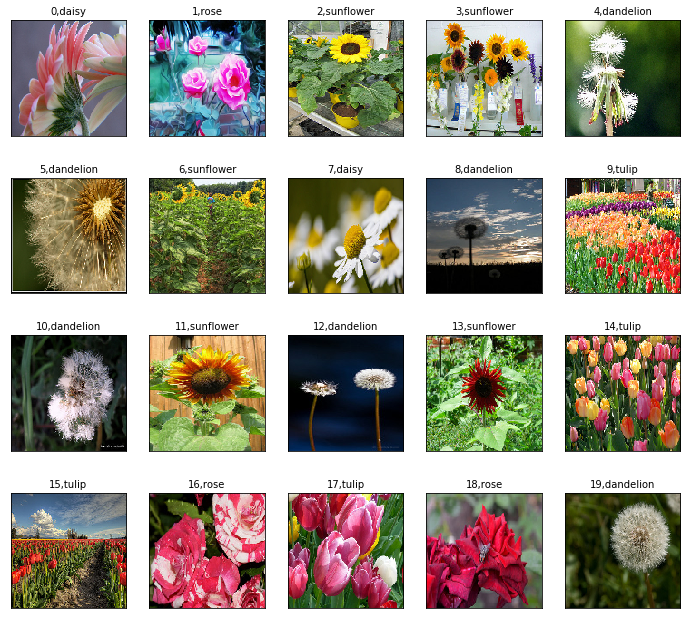

In [5]:
plot_images_labels_prediction(x_train, y_train, [], 0)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), 
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=512,kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),
                 activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',\
              metrics=['accuracy'])
train_history=model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=100, verbose=1)

Train on 2766 samples, validate on 692 samples
Epoch 1/50
2766/2766 [==============================] - 19s 7ms/sample - loss: 3.8872 - accuracy: 0.2350 - val_loss: 1.6030 - val_accuracy: 0.2601
Epoch 2/50
2766/2766 [==============================] - 10s 4ms/sample - loss: 1.6023 - accuracy: 0.2578 - val_loss: 1.5982 - val_accuracy: 0.2601
Epoch 3/50
2766/2766 [==============================] - 10s 4ms/sample - loss: 1.6008 - accuracy: 0.2393 - val_loss: 1.5975 - val_accuracy: 0.2601
Epoch 4/50
2766/2766 [==============================] - 10s 4ms/sample - loss: 1.5997 - accuracy: 0.2419 - val_loss: 1.5971 - val_accuracy: 0.2601
Epoch 5/50
2766/2766 [==============================] - 11s 4ms/sample - loss: 1.6017 - accuracy: 0.2397 - val_loss: 1.5901 - val_accuracy: 0.2890
Epoch 6/50
2000/2766 [====================>.........] - ETA: 2s - loss: 1.6020 - accuracy: 0.2535

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
scores[1]

In [9]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if (num > 25):
        num = 25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap='binary')
                
        title = str(i) + ',' + label_dict[list(labels[i]).index(1)]
        if(len(prediction) > 0):
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([])
        ax.set_yticks([])        
        idx+=1 
    plt.show()

In [10]:
prediction = model.predict_classes(x_test.astype('float32'))

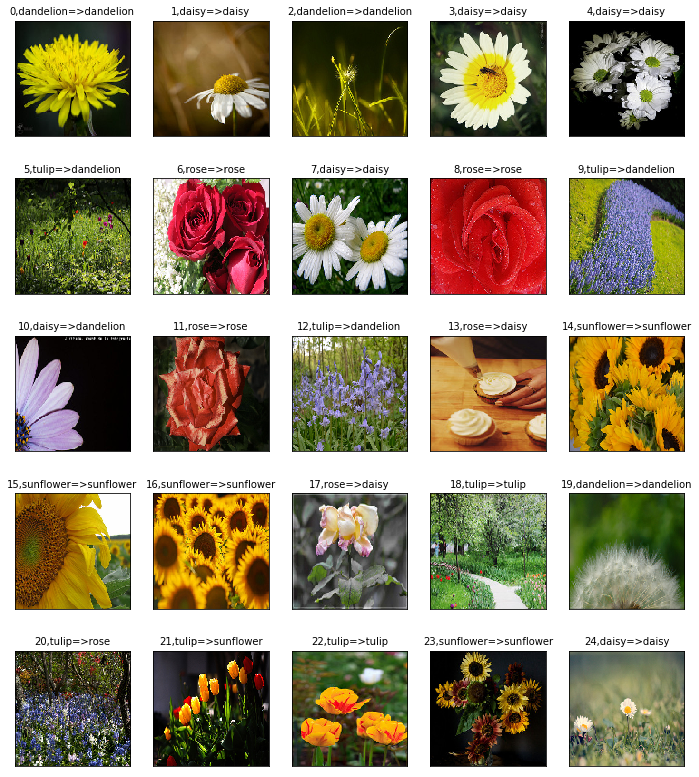

In [11]:
plot_images_labels_prediction(x_test, y_test, prediction,0,30)